In [1]:
from general_tools.notebook.gpu_utils import setup_one_gpu
GPU = 2
setup_one_gpu(GPU)

Picking GPU 2


In [2]:
import sys
import time
import numpy as np
import os.path as osp
import tensorflow as tf
import matplotlib.pyplot as plt

from general_tools.notebook.tf import reset_tf_graph

import tf_lab.point_clouds.in_out as pio

from tf_lab.point_clouds.in_out import PointCloudDataSet, write_model_ids_of_datasets

from tf_lab.point_clouds.autoencoder import Configuration as Conf

from tf_lab.autopredictors.scripts.helper import shape_net_category_to_synth_id
                                                  
from general_tools.in_out.basics import create_dir, files_in_subdirs

from general_tools.simpletons import select_first_last_and_k

from geo_tool import Point_Cloud

from tf_lab.point_clouds.gan import model_saver_id

from tf_lab.nips.shape_net import pc_loader as sn_pc_loader

from tf_lab.point_clouds.raw_gan import RawGAN

from tf_lab.point_clouds.generators_discriminators import mlp_discriminator, convolutional_discriminator,\
                                                          point_cloud_generator, leaky_relu, mlp_discriminator

In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
save_model = True
save_synthetic_samples = True
class_name = raw_input('Give me the class type.\n').lower()
syn_id = shape_net_category_to_synth_id()[class_name]
synthetic_data_out_dir = '/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/nips/our_synthetic_samples/'

do_training = True
do_plotting = True
n_pc_samples = 2048

max_epochs = 1500
arch_tag = 'mlp_arch'
leak = 0.2
dropout_prob = 0.5

discriminator = mlp_discriminator
adaptive_training = None

beta = 0.5
disc_kwargs = {'non_linearity': leaky_relu(leak), 'dropout_prob': dropout_prob}
    
generator = point_cloud_generator
gen_kwargs = {'b_norm': False, 'layer_sizes':[64, 128, 256, 512, 1024], 'dropout_prob':dropout_prob}
experiment_name = class_name + '_'+ arch_tag + '_raw_gan_' + str(n_pc_samples) +  '_pts'

Give me the class type.
table


In [5]:
top_data_dir = '/orions4-zfs/projects/lins2/Panos_Space/DATA/'
train_dir = osp.join(top_data_dir, 'OUT/models/nips/gan/raw_gan')
train_dir = osp.join(train_dir, experiment_name)
create_dir(train_dir)

full_pclouds_path = osp.join(top_data_dir, 'Point_Clouds/Shape_Net/Core/from_manifold_meshes/centered/', str(n_pc_samples))
full_pclouds_path = osp.join(full_pclouds_path, syn_id)
full_file_names = pio.load_filenames_of_input_data(full_pclouds_path, '.ply')
full_pclouds, full_model_ids, full_syn_ids = pio.load_crude_point_clouds(file_names=full_file_names,
                                                                           n_threads=25, loader=sn_pc_loader)
print '%d files containing complete point clouds were found.' % (len(full_pclouds), )

8509 files containing complete point clouds were found.


In [6]:
training_data = PointCloudDataSet(full_pclouds)
# training_data = PointCloudDataSet(full_pclouds[:100])

batch_size = 50
noise_params = {'mu':0, 'sigma': 0.5}
noise_dim = 512
init_lr = 0.0001

n_syn_samples = training_data.num_examples  # Same number as original GT data.

In [ ]:
reset_tf_graph()

gan = RawGAN(experiment_name, init_lr, [n_pc_samples, 3], noise_dim,
             discriminator, generator, beta=beta, gen_kwargs=gen_kwargs, disc_kwargs=disc_kwargs)

accum_syn_data = []
train_stats = []

1 (1.3607638506328359, 0.72937620808096493) 54.2098050117
2 (1.2395505764905144, 0.85217914055375488) 53.9249899387
3 (1.1644446720095243, 0.97487739780369931) 54.1800611019
4 (1.1178517460823059, 0.95735721482950098) 54.6137430668
5 (1.0801334889496075, 1.0524136418805403) 54.6506450176
6 (1.1302060141282924, 0.97511280915316412) 54.6699581146
7 (1.133115304217619, 0.98107753045418689) 54.7332088947
8 (1.0886008125894211, 1.0067003492046804) 54.9943959713
9 (1.1109469238449545, 1.0431000541238225) 54.7258780003
10 (1.0729145786341499, 1.0455324134405921) 54.4843409061
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/table_mlp_arch_raw_gan_2048_pts/models.ckpt-10 is not in all_model_checkpoint_paths. Manually adding it.


/usr/lib/pymodules/python2.7/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


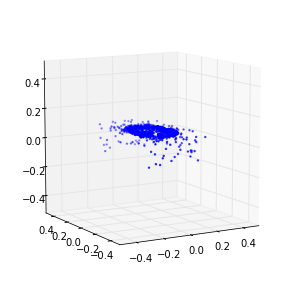

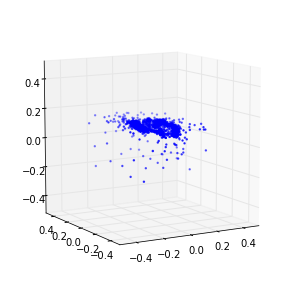

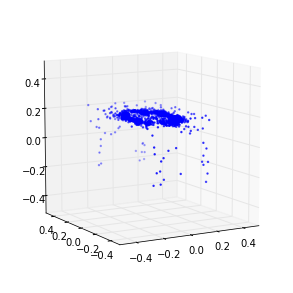

11 (1.1168397247791291, 1.0382562647847569) 54.2276351452
12 (1.0083984757170958, 1.1554825228803298) 54.8566670418
13 (1.0223498267285964, 1.1511127394788405) 54.6012580395
14 (1.1129935068242691, 1.086456719566794) 54.5512399673
15 (1.0803316649268655, 1.0898079658255857) 54.7414209843
16 (1.0917632579803467, 1.0463516615769441) 54.6191420555
17 (1.1163500894518459, 1.0475118647603427) 54.6035888195
18 (1.1408062647370731, 1.0176631710108588) 54.6776380539
19 (1.1537434472757226, 0.9862097808543373) 54.6707959175
20 (1.1943738502614638, 0.97613363511422102) 54.6309511662
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/table_mlp_arch_raw_gan_2048_pts/models.ckpt-20 is not in all_model_checkpoint_paths. Manually adding it.


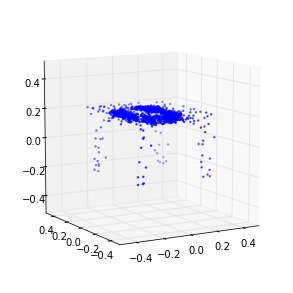

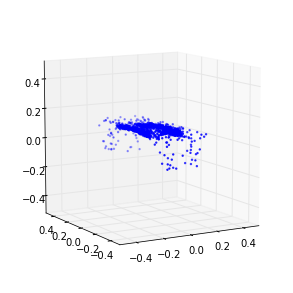

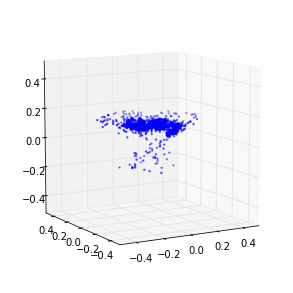

21 (1.2011905130218057, 0.95520689803011272) 54.4353830814
22 (1.2026451798046336, 0.95366422498927395) 54.7947909832
23 (1.2041075404952555, 0.96220250743276936) 54.6621010303
24 (1.2065545551917132, 0.94070093982359937) 54.6871359348
25 (1.220901773256414, 0.92875650840647084) 54.4709341526
26 (1.2194372043890112, 0.95395600094514732) 54.742650032
27 (1.2009120387189529, 0.91981278938405653) 54.5743420124
28 (1.2001254740883323, 0.954116191758829) 54.6553399563
29 (1.2053589049507589, 0.92990297867971305) 54.5990209579
30 (1.2217943436959211, 0.9516150488572962) 54.7816820145
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/table_mlp_arch_raw_gan_2048_pts/models.ckpt-30 is not in all_model_checkpoint_paths. Manually adding it.


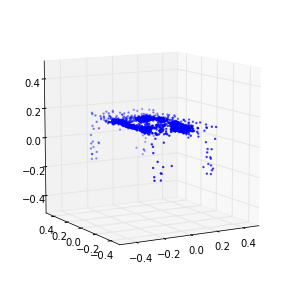

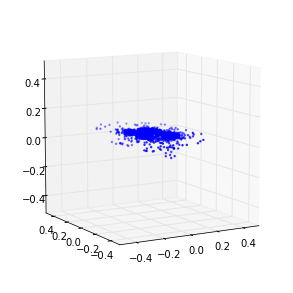

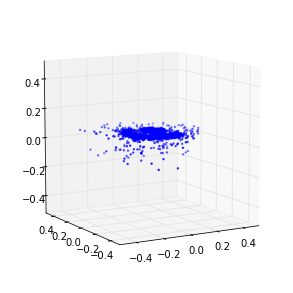

31 (1.2298983959590688, 0.93210875128998472) 54.4795479774
32 (1.2263134156956392, 0.92717653548016266) 54.5598869324
33 (1.2140710311777452, 0.93060857285471521) 54.775881052
34 (1.2340097799020655, 0.94853724661995387) 54.5281689167
35 (1.2172156796735876, 0.94923472947934096) 54.6580820084
36 (1.2230387210845948, 0.93645362748819239) 54.6623520851
37 (1.2057838594212251, 0.92053938788526202) 54.6159791946
38 (1.208494630280663, 0.93793658964774185) 54.7613019943
39 (1.1869816085871527, 0.96100698253687689) 54.8515510559
40 (1.1916657756356632, 0.94297361338839814) 54.5954978466
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/table_mlp_arch_raw_gan_2048_pts/models.ckpt-40 is not in all_model_checkpoint_paths. Manually adding it.


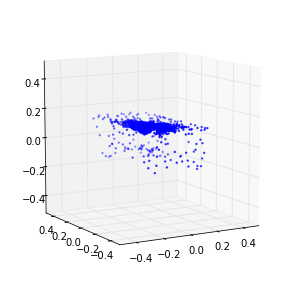

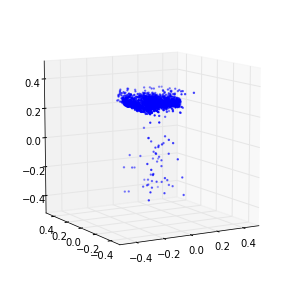

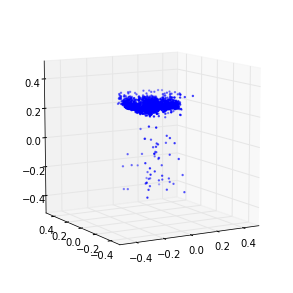

41 (1.2126319639823016, 0.93312199816984287) 54.362290144
42 (1.2240554543102489, 0.95813664531006537) 54.3926739693
43 (1.1882478131967433, 0.95442435951793891) 54.7261910439
44 (1.1830030995256759, 1.0023162442095139) 54.4124319553
45 (1.1534826846683726, 0.99762307510656467) 54.6789929867
46 (1.1638763750300687, 1.0038729981464498) 54.7888448238
47 (1.1675363218083101, 0.99717451719676742) 54.5122480392
48 (1.1963515499058892, 0.98346010393956129) 54.441975832
49 (1.172561155347263, 1.0030441685634501) 54.66305089
50 (1.1509580233517815, 1.0014611314324771) 54.6129829884
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/table_mlp_arch_raw_gan_2048_pts/models.ckpt-50 is not in all_model_checkpoint_paths. Manually adding it.


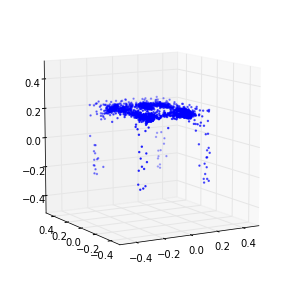

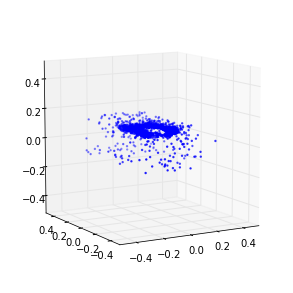

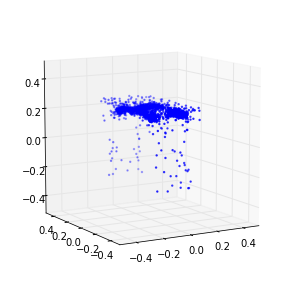

51 (1.1505173942622016, 1.0049103552804273) 54.4123189449
52 (1.1689275811700259, 1.0299569359597038) 54.7299261093
53 (1.1573712944984436, 1.0310346235247219) 54.7415211201
54 (1.1609792737399831, 1.0044420808553696) 54.5434069633
55 (1.17617285917787, 1.0289088042343364) 54.7663049698
56 (1.1314313937635982, 1.039011658465161) 54.3806622028
57 (1.1363554733641008, 1.0298492237048991) 54.7277569771
58 (1.128995537407258, 1.0488845262457342) 54.7364020348
59 (1.1414833629832548, 1.0473245629492929) 54.8058991432
60 (1.1776368916034698, 1.0273618263356825) 54.7392888069
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/table_mlp_arch_raw_gan_2048_pts/models.ckpt-60 is not in all_model_checkpoint_paths. Manually adding it.


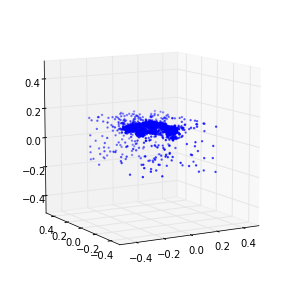

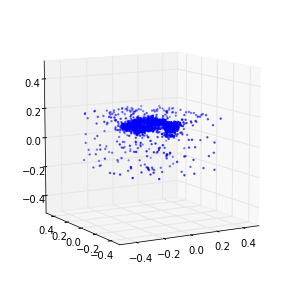

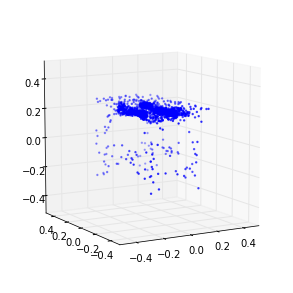

61 (1.1686840653419495, 1.0208365373751696) 54.538697958
62 (1.1633977307992822, 1.012523015457041) 54.6455740929
63 (1.1524243330254273, 1.0213835369138156) 54.7465131283
64 (1.1281632100834567, 1.0347492998137193) 54.6404960155
65 (1.1431178703027614, 1.0690162862048429) 54.5004000664
66 (1.147957864929648, 1.0606768045355293) 54.64387393
67 (1.1402701402411741, 1.0488612355554805) 54.4611771107
68 (1.1629415462998782, 1.0627637568642112) 54.3927249908
69 (1.1027819468694575, 1.0713115348535425) 54.6379539967
70 (1.130835265973035, 1.0603494859793607) 54.5692510605
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/table_mlp_arch_raw_gan_2048_pts/models.ckpt-70 is not in all_model_checkpoint_paths. Manually adding it.


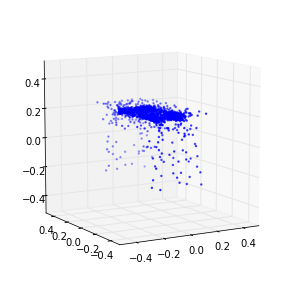

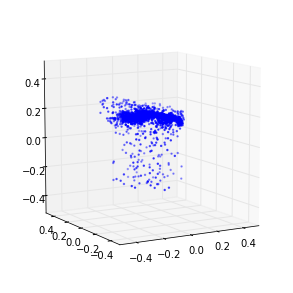

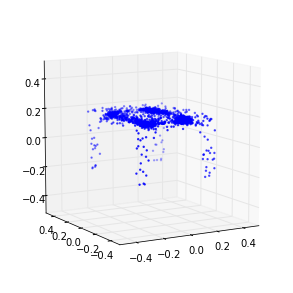

71 (1.1333410217481501, 1.0428511132212246) 54.2642769814
72 (1.1196865527068867, 1.085193088300088) 54.8400628567
73 (1.114350926174837, 1.0969564032905241) 54.5882120132
74 (1.1066775960080764, 1.1219320355092779) 54.4326598644
75 (1.1101689324659461, 1.1282745021231033) 54.6957418919
76 (1.0898468887104709, 1.1186978862566106) 54.4901378155
77 (1.0758724654422087, 1.1232155428213231) 54.6004338264
78 (1.0972122648183038, 1.1303504985921524) 54.7430529594
79 (1.0635621863252975, 1.1706862600410686) 54.7338821888
80 (1.0660478907472948, 1.1780779491452609) 54.8472502232
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/table_mlp_arch_raw_gan_2048_pts/models.ckpt-80 is not in all_model_checkpoint_paths. Manually adding it.


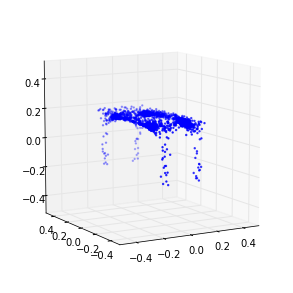

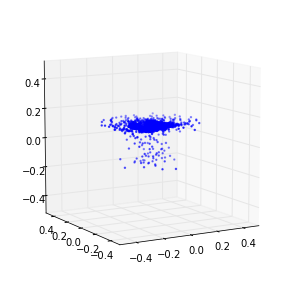

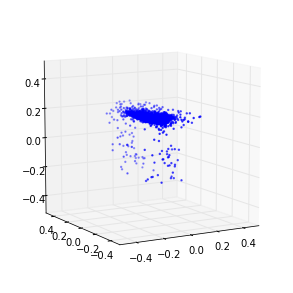

81 (1.0718857944011688, 1.1848495600854649) 54.3964560032
82 (1.0819964443936068, 1.1761534794288524) 54.8089687824
83 (1.0657131286228405, 1.1821827758761014) 54.4895789623
84 (1.1182406148489783, 1.1321911978371002) 54.3917059898
85 (1.0908550178303438, 1.1317422986030579) 54.5714390278
86 (1.0862256996771869, 1.129831444866517) 54.5050289631
87 (1.1116732450092539, 1.1342878506464116) 54.5696768761
88 (1.115578415113337, 1.1197544913081561) 54.475386858
89 (1.0826486787375282, 1.1306941851096994) 54.6563260555
90 (1.093736372274511, 1.1463013072224224) 54.4406840801
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/table_mlp_arch_raw_gan_2048_pts/models.ckpt-90 is not in all_model_checkpoint_paths. Manually adding it.


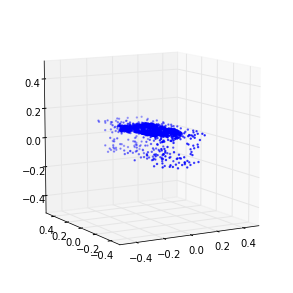

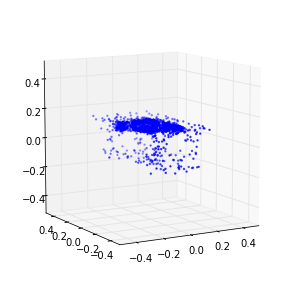

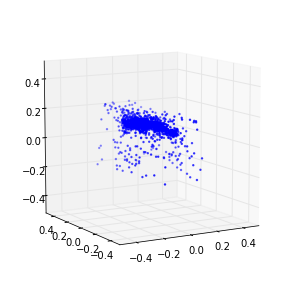

91 (1.043119980657802, 1.1837837745161617) 54.2287290096
92 (1.0698792727554545, 1.1914151973584119) 54.4249489307
93 (1.0745888026321635, 1.1652649597210043) 54.5061130524
94 (1.0627715745392967, 1.1987217731335584) 54.3327949047
95 (1.0454819496940164, 1.2142250380095314) 54.2498929501
96 (1.051936222525204, 1.2161380432984408) 54.3646800518
97 (1.0563535374753616, 1.2058588038472569) 54.3785879612
98 (1.0267117658082177, 1.2248787183971965) 54.3417670727
99 (1.046353045982473, 1.2105605055304134) 54.4067451954
100 (1.065638878064997, 1.1946037080358056) 54.5685949326
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/table_mlp_arch_raw_gan_2048_pts/models.ckpt-100 is not in all_model_checkpoint_paths. Manually adding it.


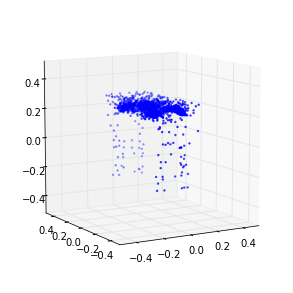

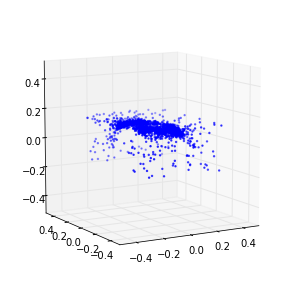

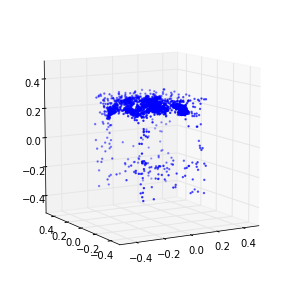

101 (1.0312244148815379, 1.2252975425299477) 54.2238879204
102 (1.0294399748830234, 1.2458965925609364) 54.4871277809
103 (1.0418240413946265, 1.2510570694418515) 54.4462139606
104 (1.0655761315542109, 1.2170222189496545) 54.6019318104
105 (1.0516206460840563, 1.2373814267270706) 54.3948628902
106 (1.0557668370359083, 1.1925132062505273) 54.5637719631
107 (1.0704018003800335, 1.1865552700617734) 54.4950151443
108 (1.0616907533477336, 1.2158357339746813) 54.5517060757
109 (1.0377295501091901, 1.2279419923529906) 54.4838268757
110 (1.0457223047228421, 1.2300857428242178) 54.5534460545
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/table_mlp_arch_raw_gan_2048_pts/models.ckpt-110 is not in all_model_checkpoint_paths. Manually adding it.


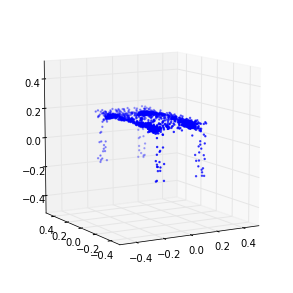

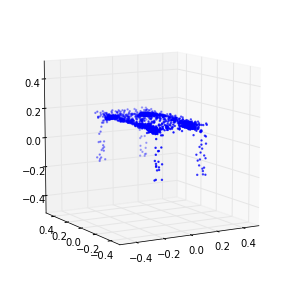

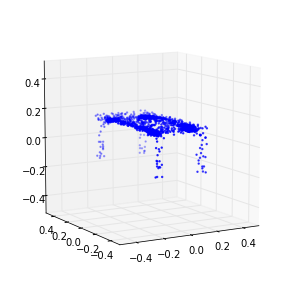

111 (1.0213735005434821, 1.2584834898219388) 54.1136028767
112 (1.0445545157965492, 1.2500131624586441) 54.6654629707
113 (1.0469660492504345, 1.2249878089217578) 54.4662799835
114 (1.0407977850998149, 1.2333071337026709) 54.5053069592
115 (1.053527414448121, 1.213203938217724) 54.5426578522
116 (1.0711329754661112, 1.1766542399630826) 54.6740109921
117 (1.0783591992714825, 1.1978012097232482) 54.5469682217
118 (1.0867837786674499, 1.2110852364231559) 54.468693018
119 (1.0621934266651378, 1.1937249092494739) 54.3874890804
120 (1.0680343382498798, 1.197962451857679) 54.4830479622
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/table_mlp_arch_raw_gan_2048_pts/models.ckpt-120 is not in all_model_checkpoint_paths. Manually adding it.


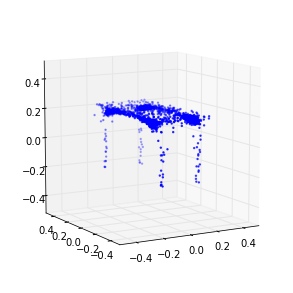

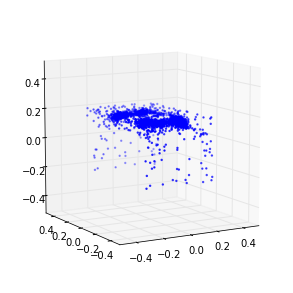

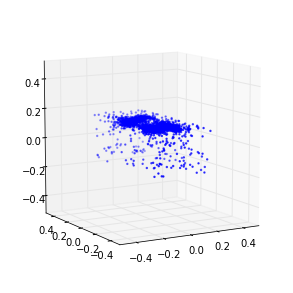

121 (1.1007040370913113, 1.1732866224120646) 54.3007910252
122 (1.0791872326065512, 1.183855011883904) 54.4010169506
123 (1.0385839476304897, 1.1931031083359438) 54.4975161552
124 (1.0761583300197826, 1.2126529854886672) 54.4734380245
125 (1.0295331481625052, 1.2149696953156415) 54.5103390217
126 (1.0732437200406018, 1.2103608233087204) 54.2928299904
127 (1.1072417809682733, 1.1675536629031686) 54.5141980648
128 (1.0923004332710715, 1.1949350618264254) 54.3800189495
129 (1.0612040768651401, 1.1921002226717332) 54.4637219906
130 (1.0981086110367495, 1.1607520271750058) 54.4138040543
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/table_mlp_arch_raw_gan_2048_pts/models.ckpt-130 is not in all_model_checkpoint_paths. Manually adding it.


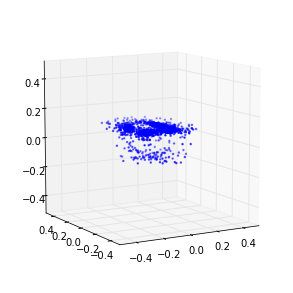

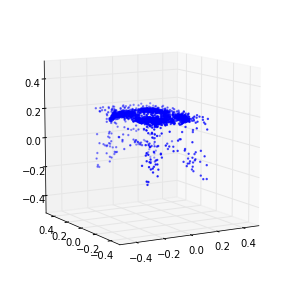

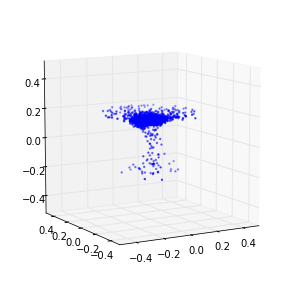

131 (1.0927362231647266, 1.1871955422794118) 54.2744348049
132 (1.0982926186393289, 1.1551856482730192) 54.6140480042
133 (1.0956113254322726, 1.167328515473534) 54.951007843
134 (1.0730718142846052, 1.1694159772466211) 54.5959541798
135 (1.0923590526861302, 1.1680146525887882) 54.3361639977
136 (1.0832094588700463, 1.1864690596566481) 54.6024188995
137 (1.0803365693372839, 1.2093460118069368) 54.4385139942
138 (1.0147105599150938, 1.2634833370938021) 54.5316598415
139 (1.0765437105122735, 1.2265360478092642) 54.4995059967
140 (1.0707728273728314, 1.1832390026134603) 54.5360100269
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/table_mlp_arch_raw_gan_2048_pts/models.ckpt-140 is not in all_model_checkpoint_paths. Manually adding it.


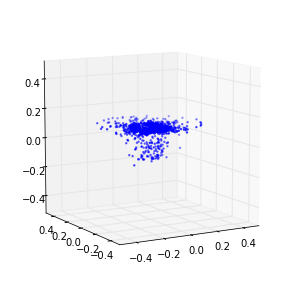

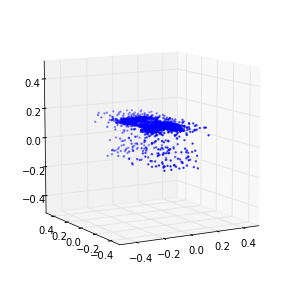

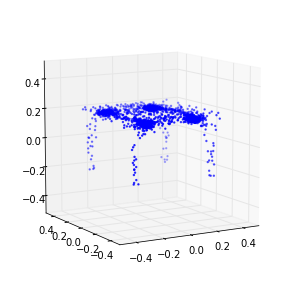

141 (1.0827374745817746, 1.2271562253727633) 54.1961369514
142 (1.0636320822379168, 1.2436847451855155) 54.7455260754
143 (1.078826785438201, 1.183843886326341) 54.5168039799
144 (1.0991373563514035, 1.1743120431900025) 54.601929903
145 (1.0203106540090898, 1.2439916473977706) 54.5890789032
146 (1.0741166567101199, 1.2070138833102058) 54.5837831497
147 (1.0591441501589383, 1.1990931945688583) 54.5013208389
148 (1.058745493958978, 1.240323272522758) 54.5870831013
149 (1.0652347785585068, 1.2252435673685635) 54.3840968609
150 (1.0684031405869652, 1.2401693014537587) 54.4569830894
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/table_mlp_arch_raw_gan_2048_pts/models.ckpt-150 is not in all_model_checkpoint_paths. Manually adding it.


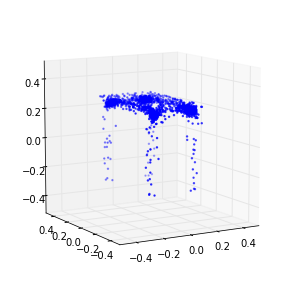

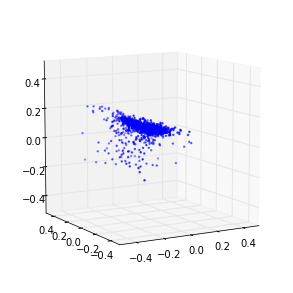

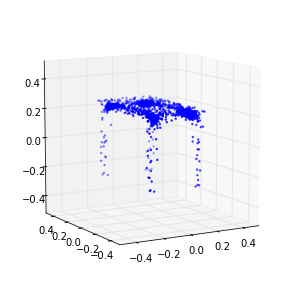

151 (1.0700954784365262, 1.2150443303234437) 54.0798640251
152 (1.0801811151644762, 1.2047883701675079) 54.3649430275
153 (1.0712557333357193, 1.2031368078554379) 54.4615302086
154 (1.0677649543565861, 1.2636414615546956) 54.3555090427
155 (1.0647612456013174, 1.2041411466458265) 54.4180300236
156 (1.0718833351836485, 1.2013082122101504) 54.4584770203
157 (1.0634416888741887, 1.2182680066894083) 54.4068770409
158 (1.0600535333156587, 1.2496230179772658) 54.4999711514
159 (1.0902586158584147, 1.1969851986450308) 54.5867490768
160 (1.0922727434074178, 1.1987679325482425) 54.4559419155
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/table_mlp_arch_raw_gan_2048_pts/models.ckpt-160 is not in all_model_checkpoint_paths. Manually adding it.


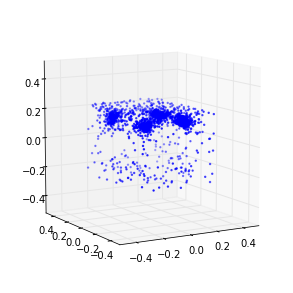

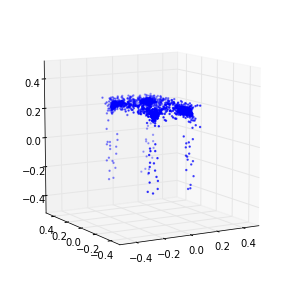

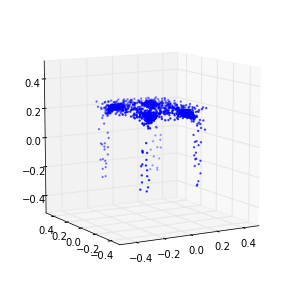

161 (1.0570702805238612, 1.1720314523752997) 54.0811390877
162 (1.0630076134906095, 1.1847652259994956) 54.4436290264
163 (1.0448561864740709, 1.2251864657682532) 54.6475229263
164 (1.0470302690477933, 1.2316990098532508) 54.3956420422
165 (1.0331716569030986, 1.2217316054246006) 54.3428971767
166 (1.0523953819976133, 1.2504270665785846) 54.3060891628
167 (1.0558478544740115, 1.228177348655813) 54.5277249813
168 (1.0454214302932514, 1.2305058566962972) 54.4247779846
169 (1.0542121606714585, 1.2303239198292002) 54.4367809296
170 (1.0566337403129129, 1.2596480462480995) 54.4914460182
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/table_mlp_arch_raw_gan_2048_pts/models.ckpt-170 is not in all_model_checkpoint_paths. Manually adding it.


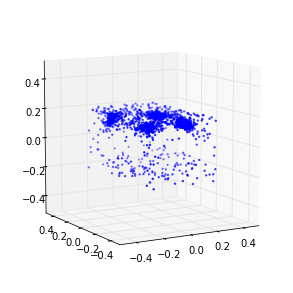

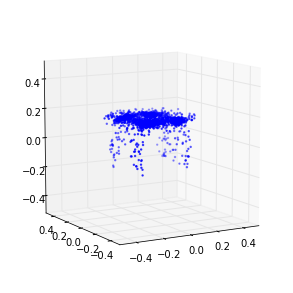

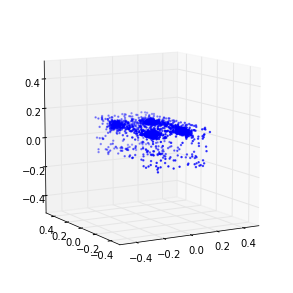

171 (1.0614201261716731, 1.2468907906728632) 54.3546330929
172 (1.0714905297054964, 1.2093273553778143) 54.5749311447
173 (1.0562516380758846, 1.2108521310722127) 54.5346269608
174 (1.0439493028556599, 1.2465187365517896) 54.4749031067
175 (1.0693731483291178, 1.2429592956514919) 54.46037817
176 (1.0469802611014423, 1.1917942415265477) 54.3062520027
177 (1.0630502869101133, 1.1941490481881534) 54.4623010159
178 (1.0518123072736403, 1.2147830083089717) 54.3416471481
179 (1.0596920672584982, 1.2631188152467503) 54.5072989464
180 (1.0333366783226237, 1.2472422182559968) 54.402971983
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/table_mlp_arch_raw_gan_2048_pts/models.ckpt-180 is not in all_model_checkpoint_paths. Manually adding it.


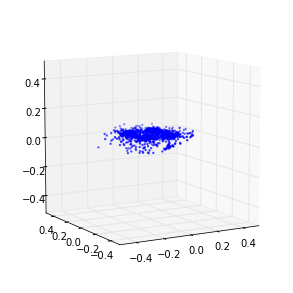

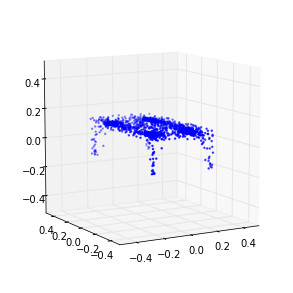

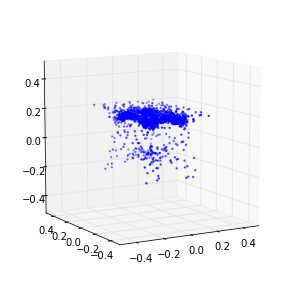

181 (1.0376200321842641, 1.2436464786529542) 54.25481987
182 (1.0117530163596657, 1.2692952292806963) 54.6348819733
183 (1.003650798517115, 1.3002121809650871) 54.6038169861
184 (1.04412821671542, 1.2412022015627693) 54.5231230259
185 (1.0613292939522687, 1.2306160222081577) 54.4828329086
186 (1.0709646929712857, 1.205329920614467) 54.4662389755
187 (1.0566295329262227, 1.198298000237521) 54.4423627853
188 (1.0617734404171215, 1.1981350244844662) 54.4736881256
189 (1.0309974877273336, 1.2203632030416938) 54.4924528599
190 (1.066955486465903, 1.194103673451087) 54.4862508774
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/table_mlp_arch_raw_gan_2048_pts/models.ckpt-190 is not in all_model_checkpoint_paths. Manually adding it.


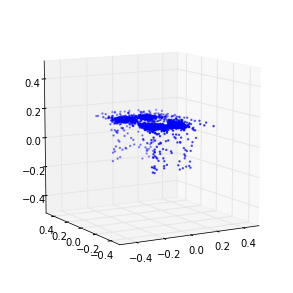

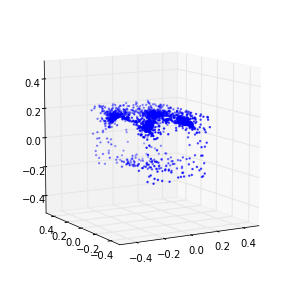

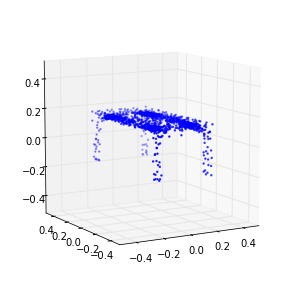

191 (1.0578377534361447, 1.1947898442254348) 54.3596930504
192 (1.0513952844283161, 1.1993122409371768) 54.5293781757
193 (1.050711197712842, 1.2062646785203148) 54.5692420006
194 (1.032138841643053, 1.2143310443443411) 54.3873250484
195 (1.0393011727753807, 1.2344832479953767) 54.4859628677
196 (1.0374369197032032, 1.2251180859173045) 54.3439970016
197 (1.0801293937598957, 1.1992463650072323) 54.5122601986
198 (1.0316314686747159, 1.2333029950366301) 54.5450367928
199 (1.0558977547813864, 1.2032381057739259) 54.4423501492
200 (1.0239373687435598, 1.2277113020420074) 54.5985360146
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/table_mlp_arch_raw_gan_2048_pts/models.ckpt-200 is not in all_model_checkpoint_paths. Manually adding it.


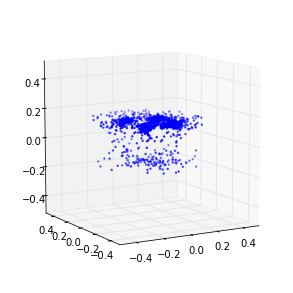

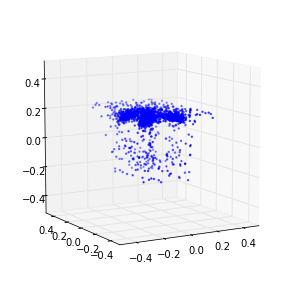

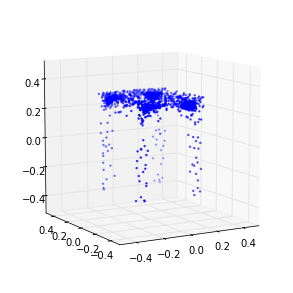

201 (1.047651533870136, 1.21945319982136) 54.2672901154
202 (1.0555217381785897, 1.2202559109996347) 54.5992190838
203 (1.0433834710541894, 1.2143481486860443) 54.5287070274
204 (1.0373750399140751, 1.2572070283048293) 54.6497938633
205 (1.04432274944642, 1.2634015546125523) 54.4675548077
206 (1.0201918836902171, 1.2533369151984943) 54.5223300457
207 (1.046695269205991, 1.2594302401823156) 54.3896560669
208 (1.0502421515829423, 1.2386908969458412) 54.5367841721
209 (1.0557141637100893, 1.2475509056273628) 54.3482029438
210 (1.0492591780774734, 1.2814578633098042) 54.2913370132
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/table_mlp_arch_raw_gan_2048_pts/models.ckpt-210 is not in all_model_checkpoint_paths. Manually adding it.


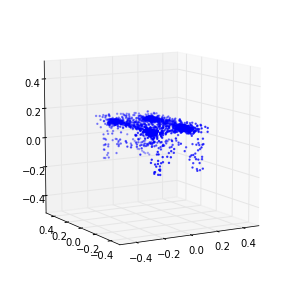

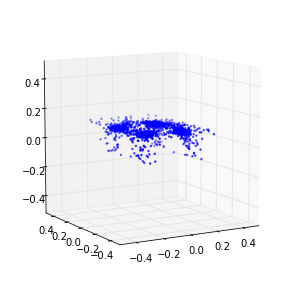

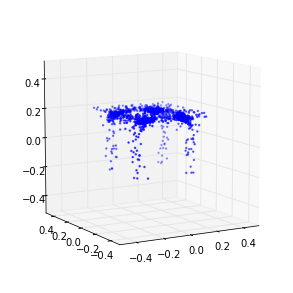

211 (1.0454136557438793, 1.2251092179733165) 54.1490359306
212 (1.0308199735248791, 1.2911069869995118) 54.5070559978
213 (1.0125577782883364, 1.2907106962274102) 54.4783728123
214 (1.0220805059461033, 1.297470683560652) 54.2605311871
215 (0.99823073394158313, 1.2879883874865139) 54.3286190033
216 (1.003871135150685, 1.2800524292623296) 54.3691830635
217 (1.0378774849807515, 1.2790094252894906) 54.4276790619
218 (0.99285306334495549, 1.2645852826973971) 54.3777999878
219 (0.9938018378089456, 1.287170445919037) 54.4386808872
220 (0.99824177412425774, 1.2970265469130349) 54.3901398182
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/table_mlp_arch_raw_gan_2048_pts/models.ckpt-220 is not in all_model_checkpoint_paths. Manually adding it.


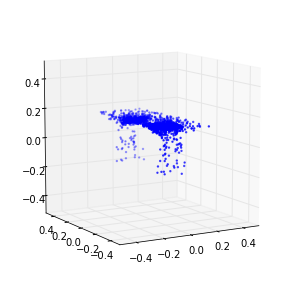

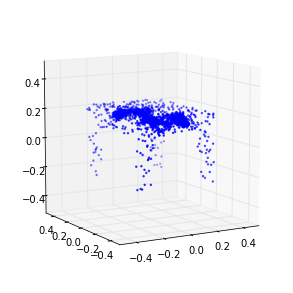

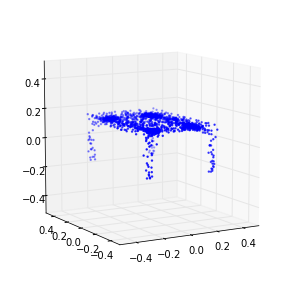

221 (0.99533723592758183, 1.3024272883639616) 54.1171119213
222 (1.0019248124431162, 1.2738819022389019) 54.5178790092
223 (1.0038701555308174, 1.2888855036567239) 54.6430261135
224 (1.0135258895509383, 1.2952291486894383) 54.5375599861
225 (1.0090783340089462, 1.2921327240326825) 54.3879821301
226 (1.0070322075310876, 1.2550693909911548) 54.4700570107
227 (1.038095357137568, 1.2539106937015758) 54.4383971691
228 (1.0376041156404159, 1.259803936937276) 54.5396609306
229 (0.99905688797726355, 1.2774599057786604) 54.4100520611
230 (1.0275800203575807, 1.2677669027272394) 54.4731328487
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/table_mlp_arch_raw_gan_2048_pts/models.ckpt-230 is not in all_model_checkpoint_paths. Manually adding it.


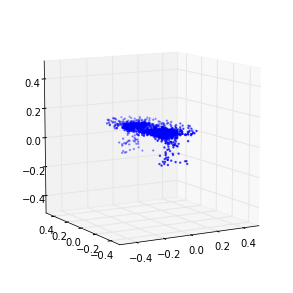

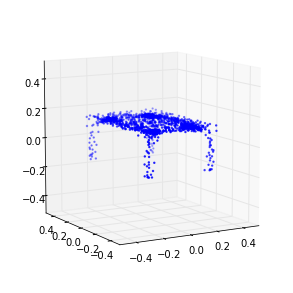

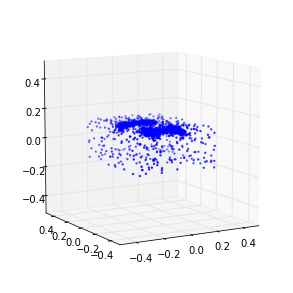

231 (1.0105100407319911, 1.29683258042616) 53.7552411556
232 (0.99426751943195568, 1.3154169569997227) 53.763076067
233 (0.97255103517981134, 1.2818777769804002) 53.7764220238
234 (0.9807347385322347, 1.3432351313969668) 53.7580859661
235 (0.97075214771663443, 1.2915129402104546) 53.7562031746
236 (0.96084341476945312, 1.3448550217291888) 53.7610850334
237 (0.95955530440106107, 1.3479646612616147) 53.7883710861
238 (0.95054315083167129, 1.3752609642112956) 53.7402191162
239 (0.98872985980089978, 1.3272081252406625) 53.7871129513
240 (0.95425680490101084, 1.3236101168043473) 53.8196098804
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/table_mlp_arch_raw_gan_2048_pts/models.ckpt-240 is not in all_model_checkpoint_paths. Manually adding it.


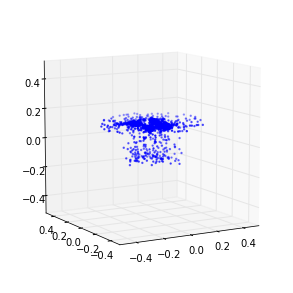

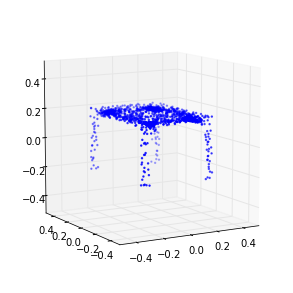

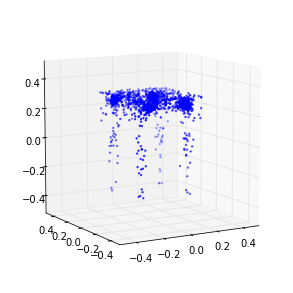

241 (0.9703227902159971, 1.3361955690033296) 53.7158720493
242 (0.95215720359016864, 1.3370919574709499) 53.7309370041
243 (0.99434482069576491, 1.3380942881107329) 53.7108211517
244 (0.99861441359800451, 1.2999593687408111) 53.807600975
245 (0.96946541912415451, 1.338726645883392) 53.821641922
246 (0.98572288576294398, 1.2974228415419073) 53.7348928452
247 (1.0057409381165223, 1.3071061477941626) 53.7910051346
248 (0.99246491824879368, 1.3060380713028066) 53.8214278221
249 (0.99729587190291458, 1.3150730083970463) 53.8052408695
250 (0.9922841969658347, 1.3093905024668751) 53.718985796
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/table_mlp_arch_raw_gan_2048_pts/models.ckpt-250 is not in all_model_checkpoint_paths. Manually adding it.


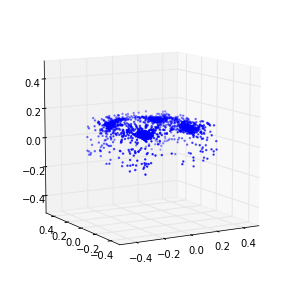

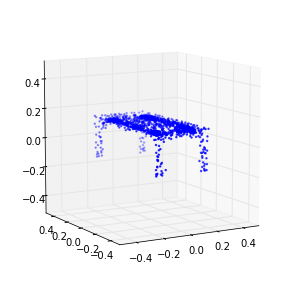

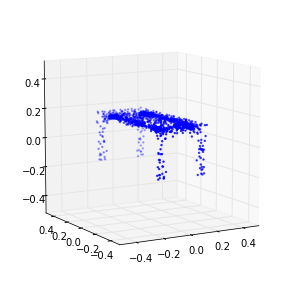

251 (0.98732292687191681, 1.2824558370253618) 53.7796199322
252 (1.0108463045428782, 1.2763309652314467) 53.7476768494
253 (0.97295235535677738, 1.3228083992705626) 53.7967839241
254 (0.95354043420623336, 1.3562054918092841) 53.7147479057
255 (0.99392397754332595, 1.3333949343246572) 53.7568848133
256 (0.98323461904245268, 1.3181245028972626) 53.7902669907
257 (1.0105696040041305, 1.2999404014909968) 53.7743759155
258 (0.99438009262084959, 1.2939710440004573) 53.7975280285
259 (1.012689104500939, 1.2910862721064511) 53.7664709091
260 (1.003528243303299, 1.2943875170805874) 53.7838230133
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/table_mlp_arch_raw_gan_2048_pts/models.ckpt-260 is not in all_model_checkpoint_paths. Manually adding it.


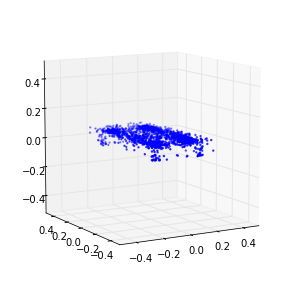

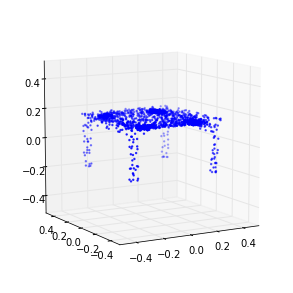

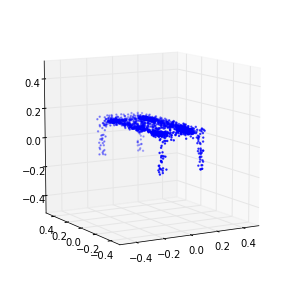

261 (0.95835255384445195, 1.3229228813858593) 53.6473219395
262 (0.9681068420410156, 1.3684529833933887) 53.7673239708
263 (0.94621618179713973, 1.3910675308283638) 53.8577189445
264 (0.97945514075896323, 1.3902141367687899) 53.693239212
265 (0.98799759570290058, 1.3274551926290288) 53.7790598869
266 (0.96796657478108128, 1.3028592498863445) 53.7923169136
267 (0.98051084700752711, 1.3007090316099279) 53.7578458786
268 (1.011652575520908, 1.2989872250486822) 53.7683188915
269 (0.9505343381096335, 1.3560006688622868) 53.8085319996
270 (0.96900209679323079, 1.3610648719703451) 53.7412729263
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/table_mlp_arch_raw_gan_2048_pts/models.ckpt-270 is not in all_model_checkpoint_paths. Manually adding it.


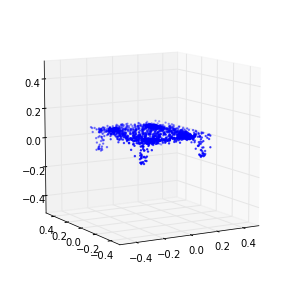

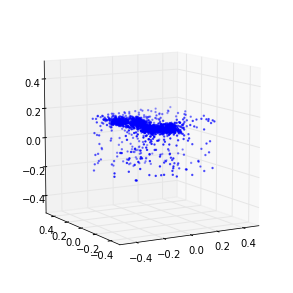

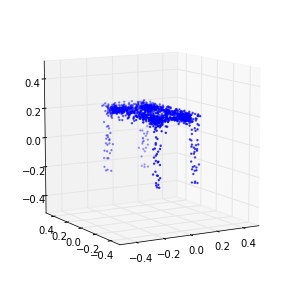

271 (0.97440713994643269, 1.3143173613969017) 53.7581110001
272 (1.0236622610512902, 1.273283315406126) 53.7244069576
273 (1.0148174878428964, 1.2480732076308307) 53.7561709881
274 (0.97393992402974294, 1.2703506799305186) 53.783244133
275 (0.9984211781445671, 1.2734652699793085) 53.7949578762
276 (1.0050324702964109, 1.2513405156486175) 53.7228729725
277 (1.0139046928461861, 1.2541923437048408) 53.724230051
278 (1.0035193566013785, 1.2700278632781086) 53.7851240635
279 (1.0396855291198281, 1.2074841204811544) 53.7997908592
280 (1.0128123504274031, 1.2354550628101124) 53.7532360554
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/table_mlp_arch_raw_gan_2048_pts/models.ckpt-280 is not in all_model_checkpoint_paths. Manually adding it.


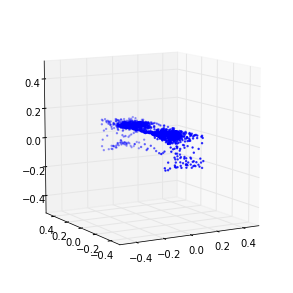

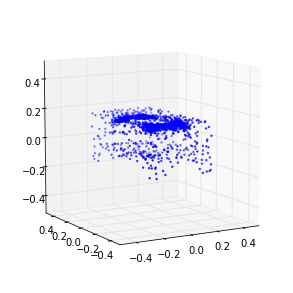

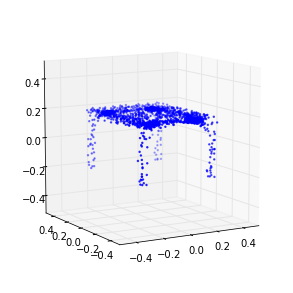

281 (1.0413050290416268, 1.2438483792192796) 53.7232940197
282 (0.99698345871532668, 1.2587385836769553) 53.807008028
283 (1.0432399104623233, 1.2619287997484208) 53.7632157803
284 (1.0155509997816647, 1.2653520931215847) 53.7743210793
285 (0.98318551217808448, 1.3100394040346146) 53.7702889442
286 (0.97809634103494536, 1.3073695775340586) 53.7248580456
287 (0.96627278222757229, 1.3168206902111277) 53.7261741161
288 (1.0209205518750584, 1.2960179996841095) 53.7170169353
289 (0.95697804724468905, 1.3404737332287957) 53.7250211239
290 (0.97410380735116842, 1.3175141483545303) 53.7384159565
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/table_mlp_arch_raw_gan_2048_pts/models.ckpt-290 is not in all_model_checkpoint_paths. Manually adding it.


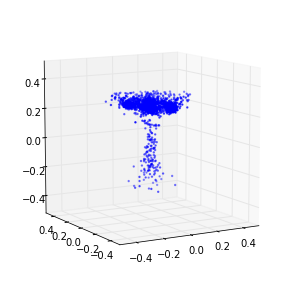

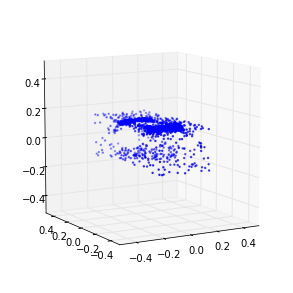

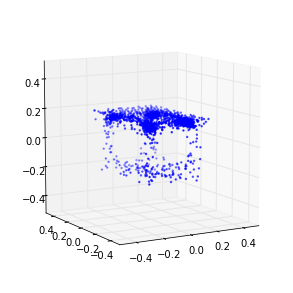

291 (0.96830693167798665, 1.3501416509642321) 53.7076239586
292 (0.96870395225637096, 1.3417842102401396) 53.7247588634
293 (0.97390353890026315, 1.3351674928384669) 53.6997759342
294 (0.98730150566381569, 1.3062920896446004) 53.740336895
295 (0.95659716970780317, 1.3387174932395711) 53.7263431549
296 (1.001855325348237, 1.3285413549226872) 53.7898459435
297 (0.95776789363692794, 1.3258174442193087) 53.7942121029
298 (0.97298453765756943, 1.35442456305027) 53.7976989746
299 (0.95400612880201896, 1.3297191579552259) 53.7697620392
300 (0.97666298571754906, 1.3578399922917872) 53.7923951149
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/table_mlp_arch_raw_gan_2048_pts/models.ckpt-300 is not in all_model_checkpoint_paths. Manually adding it.


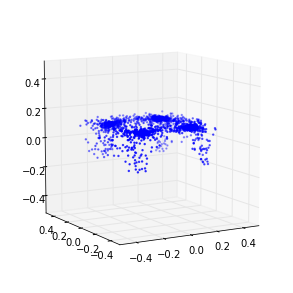

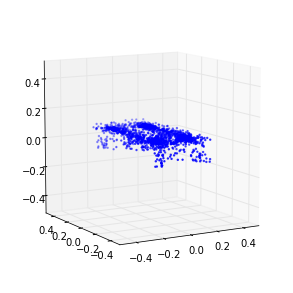

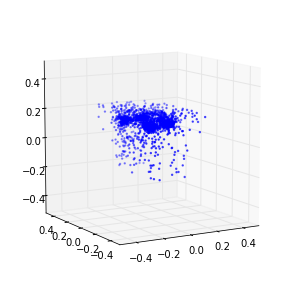

301 (0.98439060028861547, 1.2808639680638032) 53.7874321938
302 (0.97230994035215934, 1.3005252315717586) 53.8062121868
303 (0.95254259915912853, 1.3123104824739344) 53.701529026
304 (0.95581560906241925, 1.3532579348367804) 53.6903469563
305 (0.98026420333806208, 1.3039517474525115) 53.6651210785
306 (0.98563955671647019, 1.3074146744082955) 53.6439170837
307 (0.98844585594008949, 1.3170131034710828) 53.6658248901
308 (0.96668820556472335, 1.3338604970889933) 53.7286269665
309 (0.95498770966249358, 1.3378361793125377) 53.773816824
310 (0.96865950752707086, 1.3403142010464388) 53.6670000553
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/table_mlp_arch_raw_gan_2048_pts/models.ckpt-310 is not in all_model_checkpoint_paths. Manually adding it.


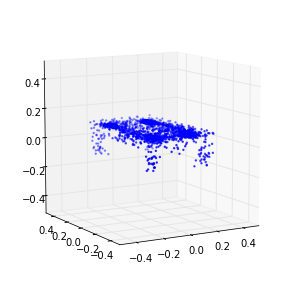

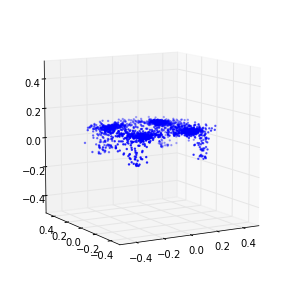

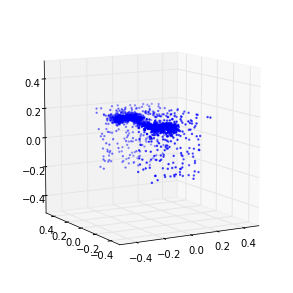

311 (0.93662140790153947, 1.3589640000287224) 53.786190033
312 (0.99093503145610584, 1.3415784055695814) 54.3410069942
313 (0.98267686402096466, 1.302768752154182) 54.3389949799
314 (0.95940235467518076, 1.2779202492798076) 54.3991189003
315 (0.9577382613630856, 1.3209051949136397) 54.4961490631
316 (0.95913124259780436, 1.3282593681531794) 54.3619000912
317 (0.95830556049066429, 1.3383098144741619) 54.4461669922
318 (0.95889772352050329, 1.326110591783243) 54.3888418674
319 (0.9352462488062242, 1.3595823684159447) 54.50725317
320 (0.9327499379129971, 1.3502158171990339) 54.3554160595
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/table_mlp_arch_raw_gan_2048_pts/models.ckpt-320 is not in all_model_checkpoint_paths. Manually adding it.


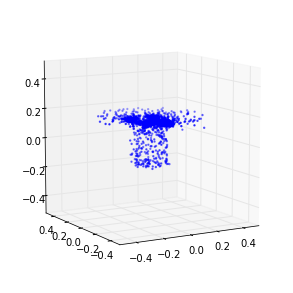

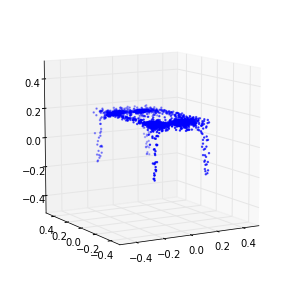

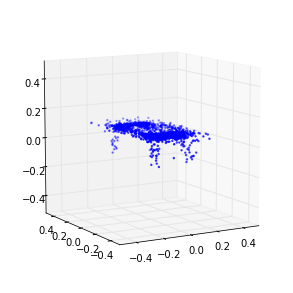

321 (0.94698093463392818, 1.3537929385900498) 54.0357789993
322 (0.9258149620364694, 1.3825015243361978) 54.4562530518
323 (0.95313936892677753, 1.3752085896099315) 54.6715760231
324 (0.93021816716474648, 1.3448298356112312) 54.5186300278
325 (0.94024914573220642, 1.3527804890099693) 54.3534178734
326 (0.93470624229487254, 1.3633207317660836) 54.4207549095
327 (0.97436895510729626, 1.3313517870271907) 54.3986442089
328 (0.95557231096660389, 1.3161802919471965) 54.5179190636
329 (0.97505754302529724, 1.313738952664768) 54.5303840637
330 (0.97734046227791727, 1.3307332561296574) 54.4682319164
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/table_mlp_arch_raw_gan_2048_pts/models.ckpt-330 is not in all_model_checkpoint_paths. Manually adding it.


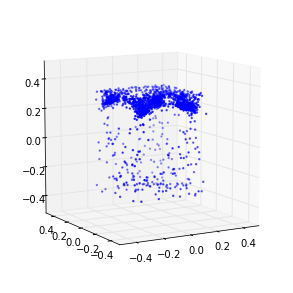

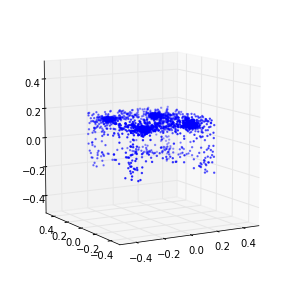

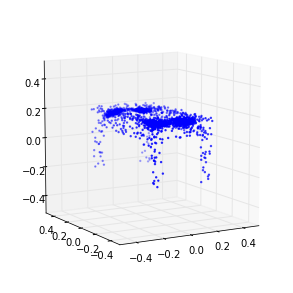

331 (0.95426127595060017, 1.3519270942491644) 53.9876539707
332 (0.94420502185821531, 1.3380370634443619) 54.5463240147
333 (0.97287425258580373, 1.319712907777113) 54.2196161747
334 (0.9921708243734696, 1.3004906344063141) 54.5022799969
335 (0.994648454469793, 1.2891745570827933) 54.2223980427
336 (0.95419568314271819, 1.314088167513118) 54.4311110973
337 (0.95164319136563469, 1.3804913191234365) 54.2855751514
338 (0.96138908652698296, 1.3497451852349673) 54.3814110756
339 (0.98119131677290972, 1.3087550012504354) 54.3281040192
340 (0.96428951550932496, 1.3627434635863585) 54.4028539658
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/table_mlp_arch_raw_gan_2048_pts/models.ckpt-340 is not in all_model_checkpoint_paths. Manually adding it.


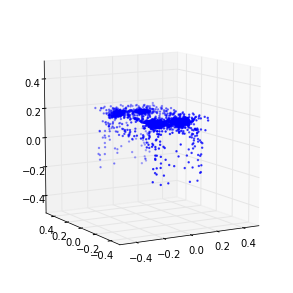

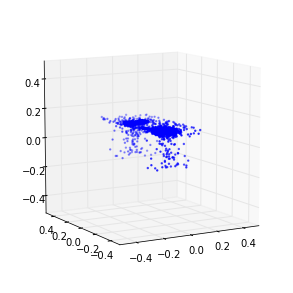

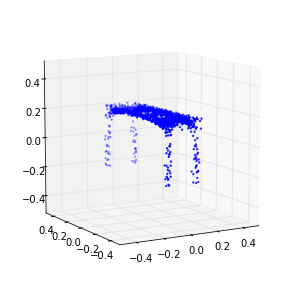

341 (0.95267504103043499, 1.3248824740157408) 54.0168740749
342 (0.96196526394170878, 1.3464740931987762) 54.4255399704
343 (0.98039859498248383, 1.3437730114249622) 54.55610919
344 (0.9371259443900164, 1.3505666231407838) 54.3881509304
345 (0.95949346738703112, 1.3491068962742301) 54.1847710609
346 (0.98367780517129333, 1.3303254835745868) 54.570070982
347 (0.95795986091389373, 1.3268204231472576) 54.2195839882
348 (0.91824195945964138, 1.3729119342916152) 54.2138371468
349 (0.96837307074490719, 1.3277291389072643) 54.4261310101
350 (0.98573535084724428, 1.3046110368826811) 54.2835819721
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/table_mlp_arch_raw_gan_2048_pts/models.ckpt-350 is not in all_model_checkpoint_paths. Manually adding it.


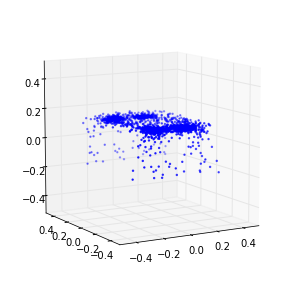

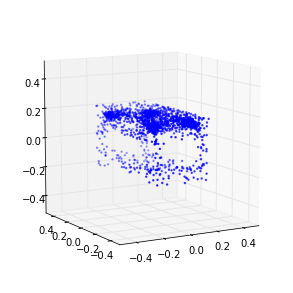

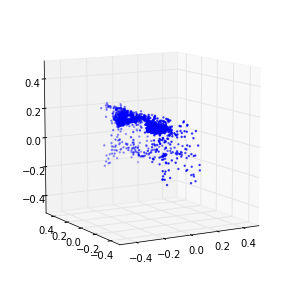

351 (0.98493280621135937, 1.3078504958573509) 54.0304899216
352 (0.94601532641579122, 1.3275324313079611) 54.3589270115
353 (0.9528264298158533, 1.3602376171771218) 54.4580879211
354 (0.92852892945794496, 1.3973748357856974) 54.3519659042
355 (0.90669063995866217, 1.4045959952999563) 54.3923780918
356 (0.96824238475631264, 1.3395591367693509) 54.3461179733
357 (0.97306721210479741, 1.3380011081695558) 54.4658119678
358 (0.95534408793729897, 1.3345769352772656) 54.2955021858
359 (0.98692610439132245, 1.3052019904641543) 54.2689990997
360 (0.96557855360648215, 1.3290920979836407) 54.5059850216
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/table_mlp_arch_raw_gan_2048_pts/models.ckpt-360 is not in all_model_checkpoint_paths. Manually adding it.


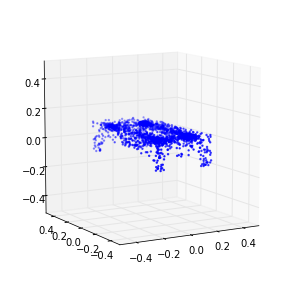

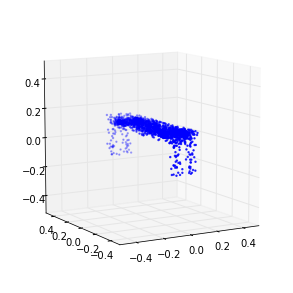

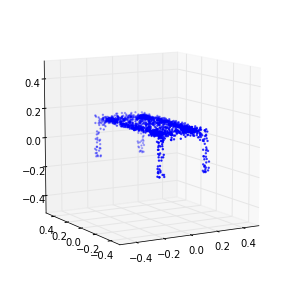

361 (0.9199170081054463, 1.3285553020589491) 54.0456008911
362 (0.96535160050672641, 1.3198920004508075) 54.4373731613
363 (0.98304354373146507, 1.2555681200588451) 54.6347360611
364 (0.9696842887822319, 1.2730866568930008) 54.4356808662
365 (0.95552053907338308, 1.2896013964624966) 54.3216331005
366 (0.95578009065459757, 1.3217581009163577) 54.3889839649
367 (0.9255802687476663, 1.3035881273886736) 54.2582840919
368 (0.96392926258199352, 1.2957435990081114) 54.5796780586
369 (0.97606228519888483, 1.2979753567891963) 54.3546388149
370 (0.96935214505476108, 1.2753302933538662) 54.2216479778
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/table_mlp_arch_raw_gan_2048_pts/models.ckpt-370 is not in all_model_checkpoint_paths. Manually adding it.


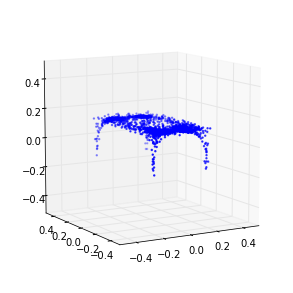

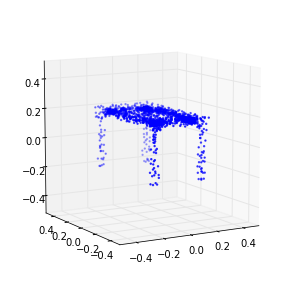

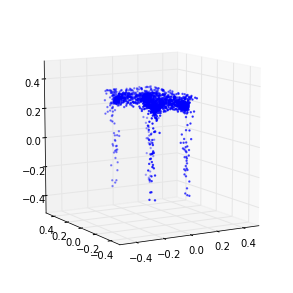

371 (0.96127648563946, 1.2918919547515757) 54.1060018539
372 (0.97151390875087063, 1.2619944095611573) 54.6443138123
373 (0.98263674974441528, 1.2577960228218752) 54.3718588352
374 (0.9640289716860827, 1.2784470032243167) 54.4784710407
375 (0.98076989159864536, 1.2851453093921437) 54.4148359299
376 (0.96851159334182735, 1.3024602704188404) 54.3359241486
377 (0.96546240694382612, 1.285140710367876) 54.5207331181
378 (0.94796115019742178, 1.3080604791641235) 54.3293399811
379 (0.97031085035380193, 1.3005471392589456) 54.4206991196
380 (0.97326180268736451, 1.2785648068960975) 54.4009978771
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/table_mlp_arch_raw_gan_2048_pts/models.ckpt-380 is not in all_model_checkpoint_paths. Manually adding it.


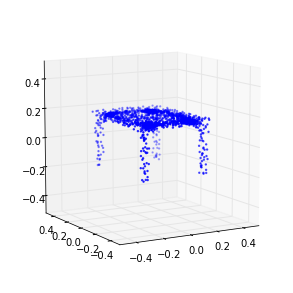

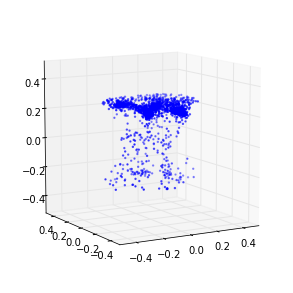

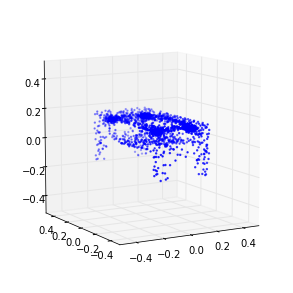

381 (0.97410962756942299, 1.2836415855323566) 54.1370179653
382 (0.98240013297866369, 1.271618334686055) 54.4874181747
383 (0.94658507529427027, 1.277544330148136) 54.7347810268
384 (0.94716479427674238, 1.3040010732762954) 54.5274810791
385 (0.93343969057588017, 1.3529848487938152) 54.2885069847
386 (0.93696613346829138, 1.3465088272795958) 54.3725090027
387 (0.93529514810618231, 1.3143711728208205) 54.4818191528
388 (0.93127836620106419, 1.3232646581004648) 54.3987791538
389 (0.91487731092116409, 1.3407224244931164) 54.3254389763
390 (0.92535208709099714, 1.3563983517534592) 54.5785589218
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/table_mlp_arch_raw_gan_2048_pts/models.ckpt-390 is not in all_model_checkpoint_paths. Manually adding it.


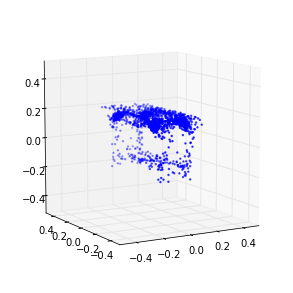

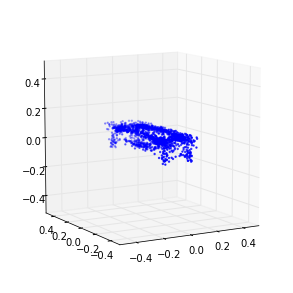

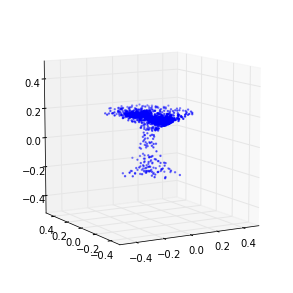

391 (0.91611653671545146, 1.3990558203528909) 53.7393910885
392 (0.92028935446458704, 1.3629694677451079) 53.7913298607
393 (0.95212166659972242, 1.3337743983549231) 53.8105010986
394 (0.89084809597800763, 1.4064883950878593) 53.7614250183
395 (0.91423440330168781, 1.383589000561658) 53.777493
396 (0.94005849045865675, 1.3326570244396434) 53.7454950809
397 (0.93339898410965416, 1.3661579679040348) 53.8061311245
398 (0.94179646758472213, 1.3452377652420717) 53.8069880009
399 (0.92952464222908016, 1.3529023829628439) 53.7961831093
400 (0.90055664427140181, 1.3838470623773687) 53.7850661278
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/table_mlp_arch_raw_gan_2048_pts/models.ckpt-400 is not in all_model_checkpoint_paths. Manually adding it.


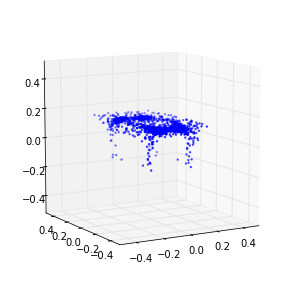

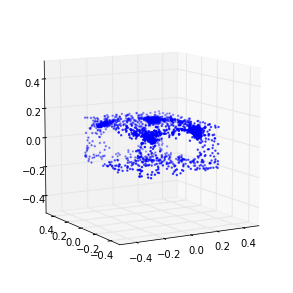

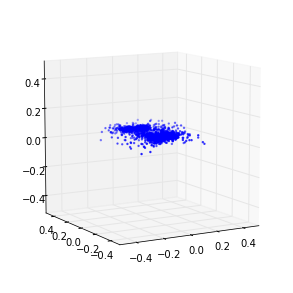

401 (0.91374849396593427, 1.3565620040192323) 53.7234010696
402 (0.95124492119340331, 1.3538675760521608) 53.779540062
403 (0.90783089925261107, 1.3832245448056388) 53.7593870163
404 (0.91073763090021465, 1.377401842439876) 53.6856310368
405 (0.91481593110982107, 1.380286308597116) 53.7360179424
406 (0.94339224240359143, 1.371082952618599) 53.7332561016
407 (0.94291200602755831, 1.3534099428092732) 53.7233760357
408 (0.93778240820940806, 1.3563349629149717) 53.6667659283
409 (0.93576509356498716, 1.3553723535116982) 53.7668390274
410 (0.91144225211704477, 1.3788162781911737) 53.7844521999
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/table_mlp_arch_raw_gan_2048_pts/models.ckpt-410 is not in all_model_checkpoint_paths. Manually adding it.


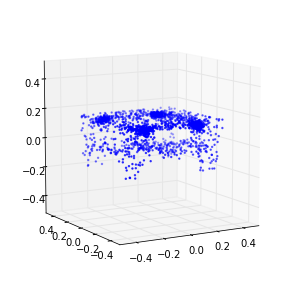

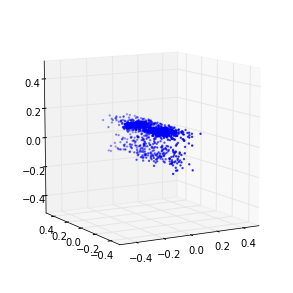

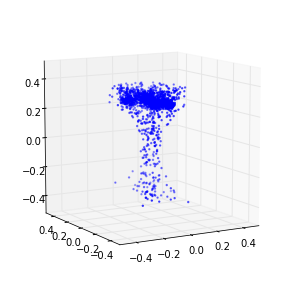

411 (0.91113731790991392, 1.3927620933336371) 53.6227481365
412 (0.89422774981049935, 1.4227939490009756) 53.7152338028
413 (0.88366102050332462, 1.4050346640979543) 53.706261158
414 (0.9098120058284086, 1.3634372861946331) 53.7751891613
415 (0.93570919071926795, 1.3412307576221578) 53.8049619198
416 (0.92530944908366486, 1.3438137201701894) 53.7565541267
417 (0.91611062919392305, 1.3602804695858675) 53.7158339024
418 (0.92075602973208703, 1.3626937743495493) 53.6770370007
419 (0.87951586246490476, 1.4055188960888807) 53.7124130726
420 (0.8944440747008604, 1.4253318211611579) 53.6863059998
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/table_mlp_arch_raw_gan_2048_pts/models.ckpt-420 is not in all_model_checkpoint_paths. Manually adding it.


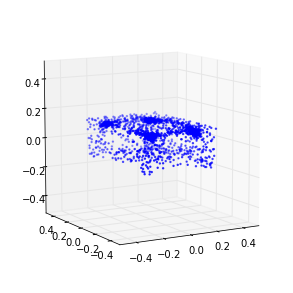

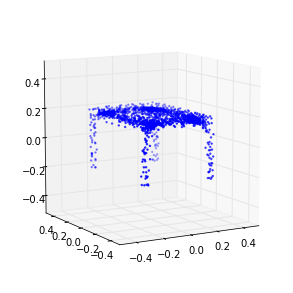

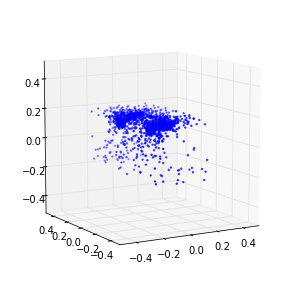

421 (0.86846073445151839, 1.477604194949655) 53.7376580238
422 (0.9011656550800099, 1.4090833614854252) 53.6697821617
423 (0.89810641022289506, 1.4328967010273652) 53.7869818211
424 (0.90902602427146018, 1.4078845213441287) 53.7959330082
425 (0.85082167842808887, 1.4358312000246609) 53.7662298679
426 (0.91278270833632524, 1.4118570008698632) 53.7883131504
427 (0.8689103726078482, 1.4234679285217733) 53.8231739998
428 (0.87115549620460064, 1.4453752955969643) 53.7736210823
429 (0.90981303628753218, 1.3994717415641336) 53.7226629257
430 (0.89099854336065409, 1.4336072704371283) 53.6983969212
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/table_mlp_arch_raw_gan_2048_pts/models.ckpt-430 is not in all_model_checkpoint_paths. Manually adding it.


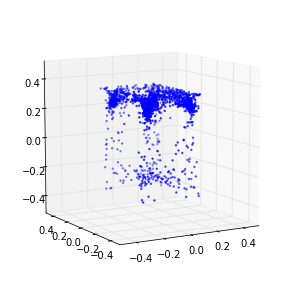

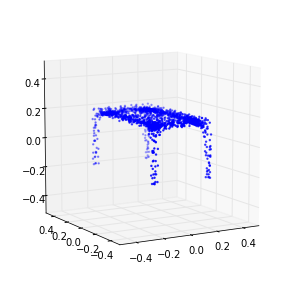

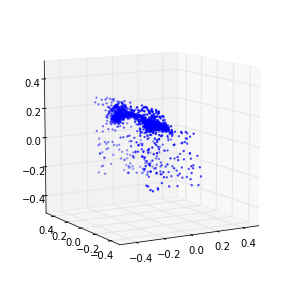

431 (0.89048132300376892, 1.3897489936912761) 53.6923220158
432 (0.89212036413304951, 1.4297806014032926) 53.7613248825
433 (0.92011214459643642, 1.3906728078337276) 53.7581579685
434 (0.89302550904891065, 1.4213683152900023) 53.7432289124
435 (0.91027454348171455, 1.403428587142159) 53.7468810081
436 (0.8951635665753308, 1.4051322414594538) 53.6861491203
437 (0.8862040638923645, 1.442278655837564) 53.8202939034
438 (0.91159970935653234, 1.4163522716830759) 53.7845079899
439 (0.88288218554328468, 1.3777675067677218) 53.7083880901
440 (0.91241869645960194, 1.3817474214469685) 53.7306518555
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/table_mlp_arch_raw_gan_2048_pts/models.ckpt-440 is not in all_model_checkpoint_paths. Manually adding it.


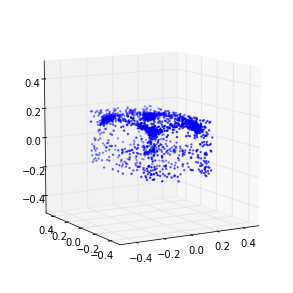

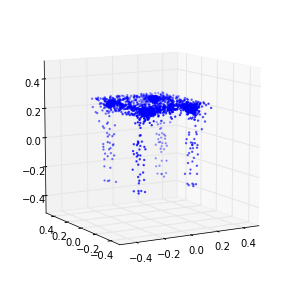

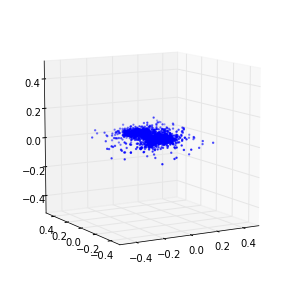

441 (0.89748036580927226, 1.4186387910562404) 53.6877288818
442 (0.93595190854633559, 1.371398840231054) 53.736164093
443 (0.87690997088656708, 1.3847181667299833) 53.6759650707
444 (0.92231830288382133, 1.3658383320359622) 53.7618150711
445 (0.90388570007155922, 1.3802319400450762) 53.712677002
446 (0.933609572578879, 1.3524253736524021) 53.7682878971
447 (0.89653008475023155, 1.3755862032665926) 53.752065897
448 (0.89436581941211923, 1.3836079011945164) 53.722222805
449 (0.91771018540157989, 1.4028193231891184) 53.6721010208
450 (0.88865369207718792, 1.4122750646927777) 53.6934039593
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/table_mlp_arch_raw_gan_2048_pts/models.ckpt-450 is not in all_model_checkpoint_paths. Manually adding it.


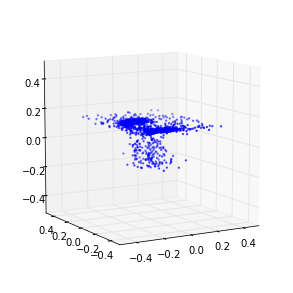

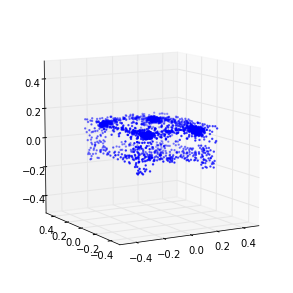

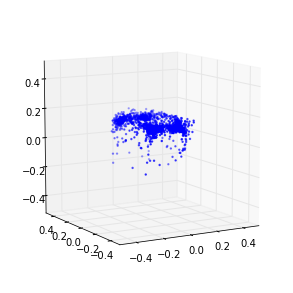

451 (0.91438761353492737, 1.3909999405636506) 53.685546875
452 (0.90096052289009099, 1.4408545753535102) 53.614677906
453 (0.88597268672550422, 1.3918647247202256) 53.7093920708
454 (0.89687051527640393, 1.4031791217186871) 53.6971709728
455 (0.88887210803873395, 1.4203859560629901) 53.7362701893
456 (0.9048056627021116, 1.4020869830075433) 53.7118320465
457 (0.92666584288372711, 1.3799739423920125) 53.7013800144
458 (0.9166965007781982, 1.3662411209414986) 53.710340023
459 (0.89249062292716086, 1.391166844438104) 53.6144640446
460 (0.87695454394116124, 1.409630216219846) 53.7117230892
INFO:tensorflow:/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/models/nips/gan/raw_gan/table_mlp_arch_raw_gan_2048_pts/models.ckpt-460 is not in all_model_checkpoint_paths. Manually adding it.


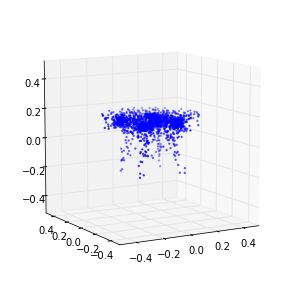

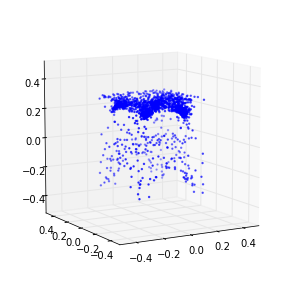

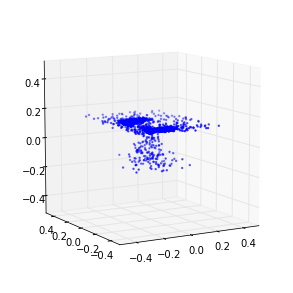

461 (0.90988017075202043, 1.3786505345036002) 53.6581950188
462 (0.88666552164975332, 1.3944372951984405) 53.6640400887
463 (0.91119697795194743, 1.365851277814192) 53.7070322037
464 (0.87357651836731853, 1.3951642450164345) 53.7715260983
465 (0.90175687039599695, 1.3904451065203722) 53.7685420513
466 (0.88204838738721958, 1.3990288317203521) 53.7734041214
467 (0.90196437099400684, 1.384586056540994) 53.7258648872
468 (0.92153723450268021, 1.3611246803227592) 53.6742339134


In [ ]:
if do_training:
    for _ in range(max_epochs + 1):
        loss, duration = gan._single_epoch_train(training_data, batch_size, noise_params, adaptive=adaptive_training)
        epoch = int(gan.sess.run(gan.epoch.assign_add(tf.constant(1.0))))
        print epoch, loss, duration
        if save_model and epoch % 10 == 0:
            checkpoint_path = osp.join(train_dir, model_saver_id)
            gan.saver.save(gan.sess, checkpoint_path, global_step=gan.epoch)
            syn_d = gan.generate(n_syn_samples, noise_params)
            accum_syn_data.append(syn_d)
            for k in range(3):
                Point_Cloud(syn_d[k]).plot(in_u_sphere=True)
        train_stats.append((epoch,) + loss)

In [ ]:
epoch_to_check = 1500
n_check = 5
check_data = accum_syn_data[(epoch_to_check / 10)-1]
rids = np.random.choice(range(len(check_data)), size=n_check, replace=False)
for i in range(n_check):
    Point_Cloud(check_data[rids[i]]).plot(in_u_sphere=True)    

In [ ]:
if do_plotting:
    x = range(len(train_stats))
    d_loss = [t[1] for t in train_stats]
    g_loss = [t[2] for t in train_stats]
    plt.plot(x, d_loss)
    plt.plot(x, g_loss)
    plt.title('Raw GAN training. (%s, %s)' % (class_name, arch_tag) )
    plt.legend(['d_loss', 'g_loss'], loc=0)
    plt.xlabel('Epochs.')
    plt.ylabel('Loss.')

In [ ]:
synthetic_data_out_dir = '/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/nips/our_synthetic_samples/'
saver_step = 10
if save_synthetic_samples:
    save_dir = osp.join(synthetic_data_out_dir, experiment_name)
    create_dir(save_dir)    
    for i, d in enumerate(accum_syn_data):
        epoc = str((i + 1) * saver_step)
        np.savez(osp.join(save_dir, 'epoch_' + epoc), d)